#### Setup & Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Dataset

In [ ]:
df = pd.read_csv('../data_extraction/csv_files/car_registration.csv')

# Preview dataset
df.head()

,Region,FuelType,YearMonth,NumberOfRegistration
0,Sweden,petrol,2006M01,13617
1,Sweden,petrol,2006M02,14687
2,Sweden,petrol,2006M03,19609
3,Sweden,petrol,2006M04,21439
4,Sweden,petrol,2006M05,24117


#### Data Overview

In [3]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (592200, 4)


In [4]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592200 entries, 0 to 592199
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Region                592200 non-null  object
 1   FuelType              592200 non-null  object
 2   YearMonth             592200 non-null  object
 3   NumberOfRegistration  592200 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 18.1+ MB


In [5]:
df.describe()

,NumberOfRegistration
count,592200.000000
mean,31.620545
std,366.362112
min,0.000000
25%,0.000000
50%,0.000000
75%,6.000000
max,32231.000000


In [6]:
df.isnull().sum()

Region                  0
FuelType                0
YearMonth               0
NumberOfRegistration    0
dtype: int64

In [7]:
df.nunique()

Region                   314
FuelType                   8
YearMonth                235
NumberOfRegistration    2966
dtype: int64

In [8]:
df['FuelType'].unique()

array(['petrol', 'diesel', 'electricity', 'electric hybrid',
       'plug-in hybrid', 'ethanol/ethanol flexifuel', 'gas/gas flex',
       'other fuels'], dtype=object)

#### Data Cleaning

In [9]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%YM%m')

In [10]:
df.columns = ['region', 'fuel_type', 'year_month', 'num_of_new_registrations']

#### Descriptive Analysis

In [12]:
# Extract year from YearMonth
df['year'] = df['year_month'].dt.year

In [13]:
df1 = df[(df['fuel_type']=='petrol') & (df['region'] =='Sweden') & (df['year'] >= 2006)]
df2 = df[(df['fuel_type']=='diesel') & (df['region'] =='Sweden') & (df['year'] >= 2006)]
df3 = df[(df['fuel_type']=='electricity') & (df['region'] =='Sweden') & (df['year'] >= 2006)]

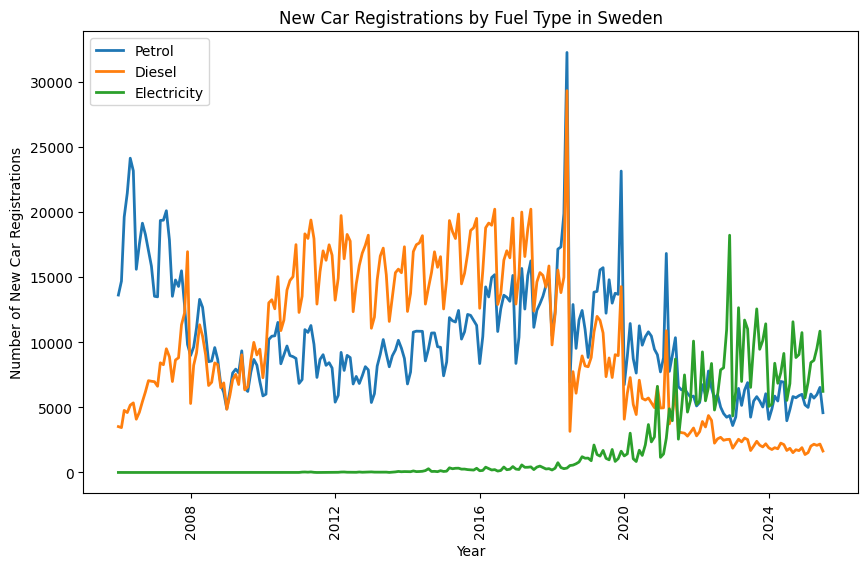

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df1['year_month'], df1['num_of_new_registrations'], linewidth=2.0, label='Petrol')
ax.plot(df2['year_month'], df2['num_of_new_registrations'], linewidth=2.0, label='Diesel')
ax.plot(df3['year_month'], df3['num_of_new_registrations'], linewidth=2.0, label='Electricity')

# To rotate the x-axis labels to a vertical orientation
ax.tick_params(axis='x', rotation=90)

# Add labels and a title for clarity
ax.set_xlabel('Year')
ax.set_ylabel('Number of New Car Registrations')
ax.set_title('New Car Registrations by Fuel Type in Sweden')

# Add a legend with a specific location
ax.legend(loc='upper left')

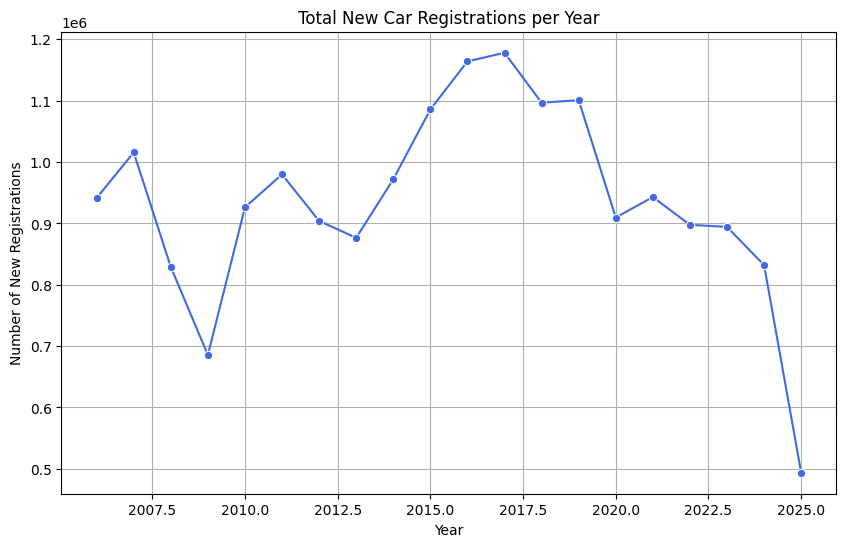

In [15]:
# Group and plot
yearly_registrations = df.groupby('year')['num_of_new_registrations'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_registrations, x="year", y="num_of_new_registrations", marker="o", color="royalblue")
plt.title("Total New Car Registrations per Year")
plt.xlabel("Year")
plt.ylabel("Number of New Registrations")
plt.grid(True)
plt.show()

/var/folders/tg/1ywxq6y562945l7bh_1btpmw0000gn/T/ipykernel_20933/404010526.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions_cars.values, y=top_regions_cars.index, palette='viridis')


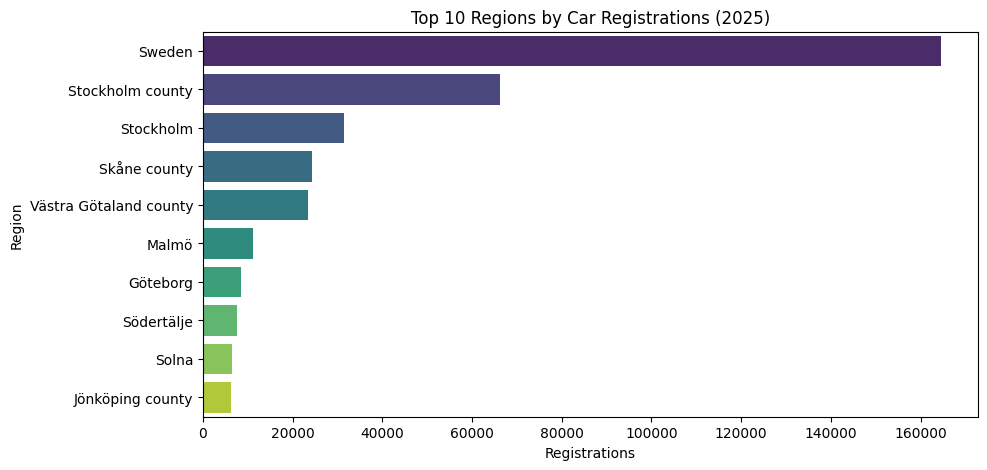

In [16]:
latest_year = df['year'].max()

top_regions_cars = (
    df[df['year'] == latest_year]
    .groupby('region')['num_of_new_registrations']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_regions_cars.values, y=top_regions_cars.index, palette='viridis')
plt.title(f"Top 10 Regions by Car Registrations ({latest_year})")
plt.xlabel("Registrations")
plt.ylabel("Region")
plt.show()


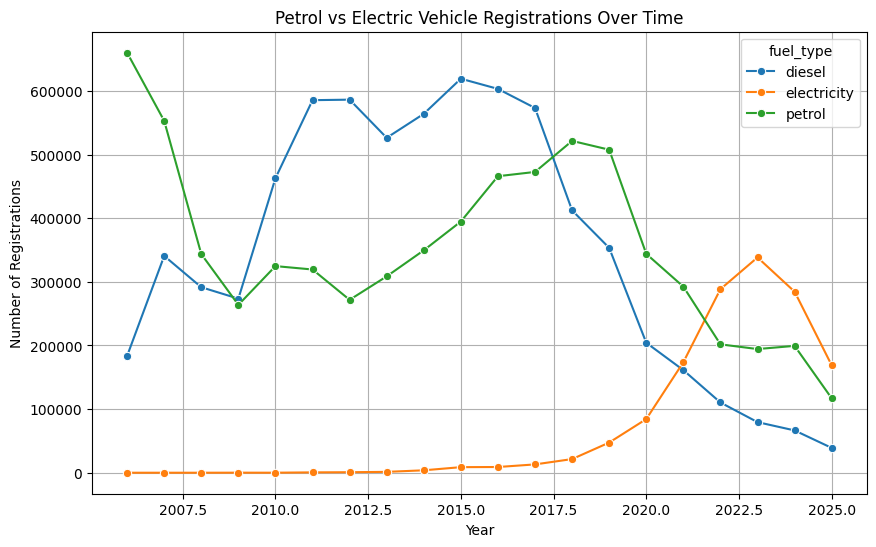

In [17]:
# Filter only petrol and electric
fuel_transition = df[
    df['fuel_type'].isin(['petrol', 'diesel', 'electricity'])
].groupby(['year', 'fuel_type'])['num_of_new_registrations'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=fuel_transition, x="year", y="num_of_new_registrations", hue="fuel_type", marker="o")
plt.title("Petrol vs Electric Vehicle Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.grid(True)
plt.show()



/var/folders/tg/1ywxq6y562945l7bh_1btpmw0000gn/T/ipykernel_20933/2707157176.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_avg, x="month", y="num_of_new_registrations", palette="coolwarm")


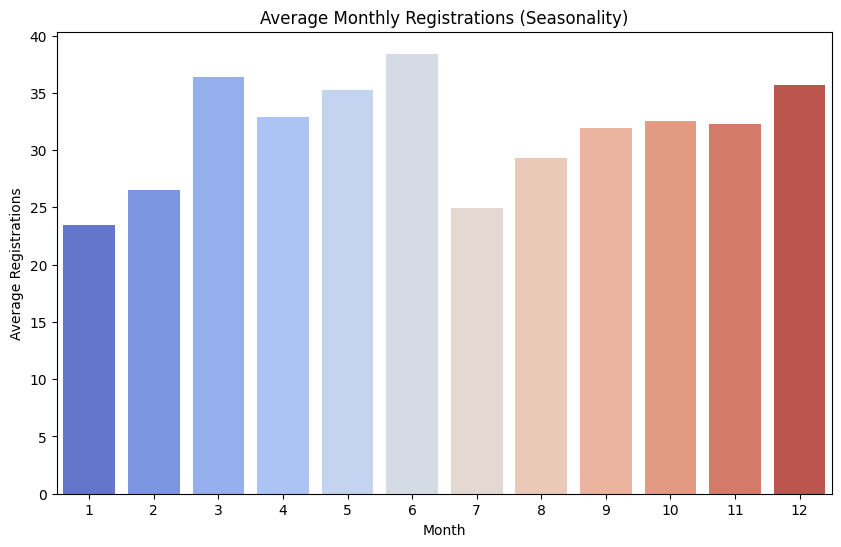

In [18]:
# Extract month number from datetime
df['month'] = df['year_month'].dt.month

# Monthly average registrations across all years
month_avg = df.groupby('month')['num_of_new_registrations'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=month_avg, x="month", y="num_of_new_registrations", palette="coolwarm")
plt.title("Average Monthly Registrations (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Average Registrations")
plt.show()


/var/folders/tg/1ywxq6y562945l7bh_1btpmw0000gn/T/ipykernel_20933/2988101801.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_leaders.values, y=ev_leaders.index, palette="viridis")


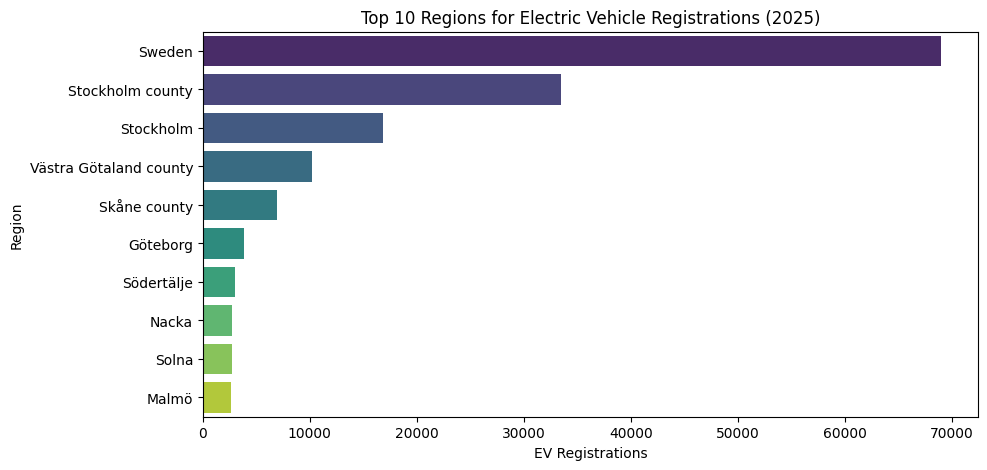

In [19]:
latest_year = df['year'].max()

ev_leaders = (
    df[(df['fuel_type'].str.contains('electric')) & (df['year'] == latest_year)]
    .groupby('region')['num_of_new_registrations']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=ev_leaders.values, y=ev_leaders.index, palette="viridis")
plt.title(f"Top 10 Regions for Electric Vehicle Registrations ({latest_year})")
plt.xlabel("EV Registrations")
plt.ylabel("Region")
plt.show()


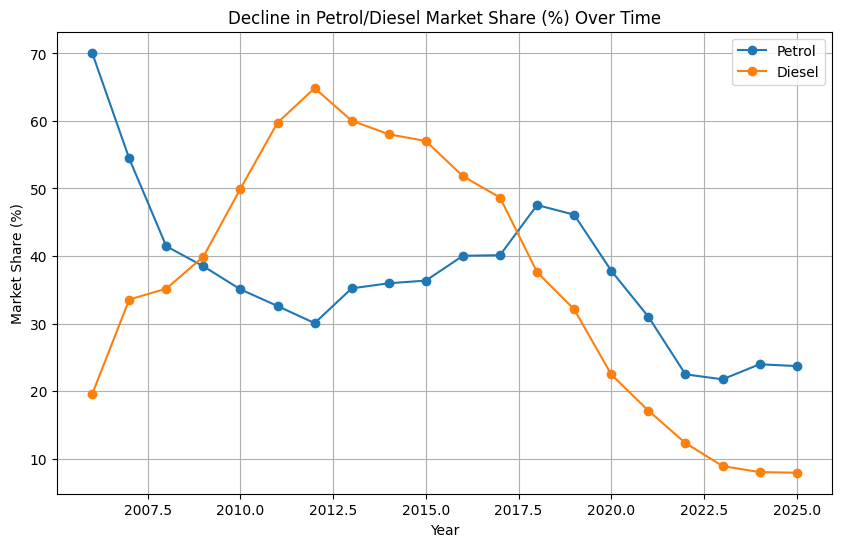

In [20]:
# Group by year and fuel type
fuel_share = df.groupby(['year', 'fuel_type'])['num_of_new_registrations'].sum().reset_index()

# Pivot for percentage share
fuel_share_pivot = fuel_share.pivot(index='year', columns='fuel_type', values='num_of_new_registrations').fillna(0)
fuel_share_percent = fuel_share_pivot.div(fuel_share_pivot.sum(axis=1), axis=0) * 100

# Focus on petrol and diesel
plt.figure(figsize=(10,6))
plt.plot(fuel_share_percent.index, fuel_share_percent['petrol'], marker='o', label='Petrol')
plt.plot(fuel_share_percent.index, fuel_share_percent['diesel'], marker='o', label='Diesel')
plt.title("Decline in Petrol/Diesel Market Share (%) Over Time")
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.legend()
plt.grid(True)
plt.show()


#### Save Dataframe

In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('csv_files/clean_car_registration.csv', index=False)